In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm.auto import tqdm
sns.set()

In [2]:
dataset_df = pd.read_csv('../data/raw/all_train.csv')

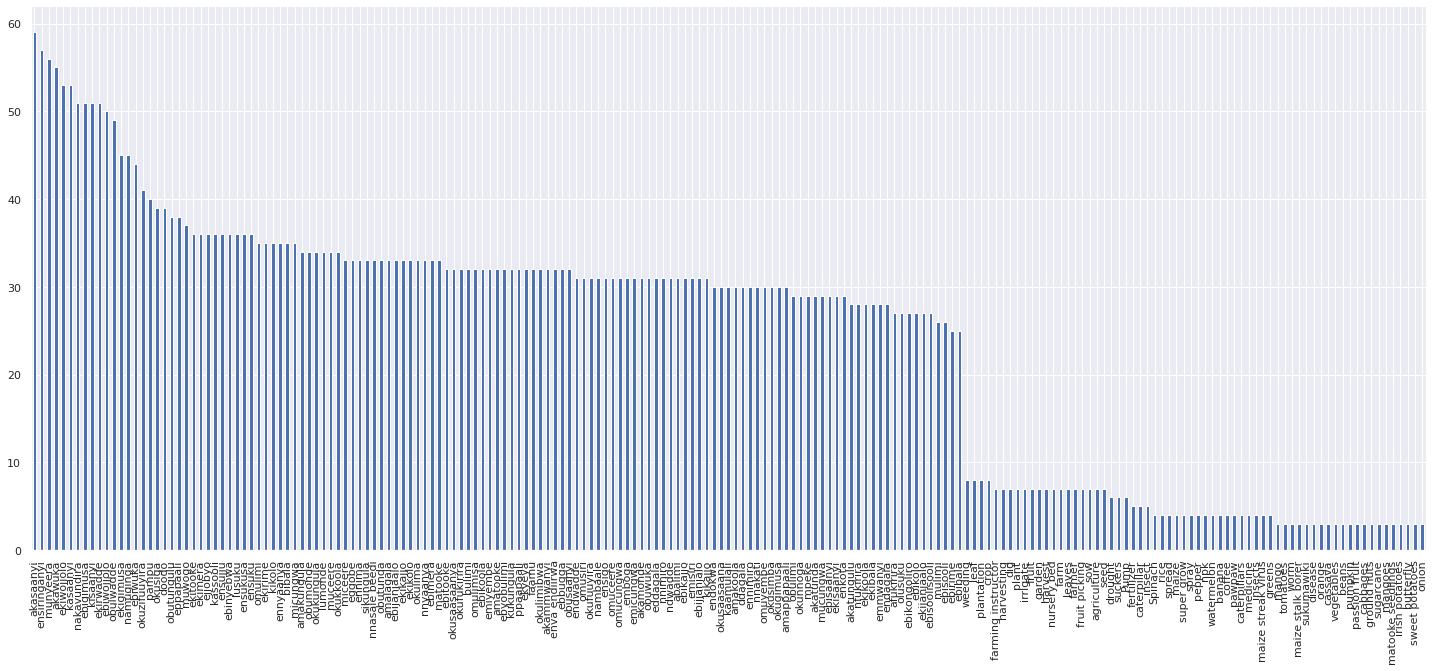

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
dataset_df['label'].value_counts().plot(kind='bar', ax=ax);

In [4]:
columns = dataset_df['group'].value_counts().index.values

In [5]:
data = dataset_df.groupby(['label', 'group'])['group'].count().unstack()
data['counts'] = data.apply(np.nansum, axis=1)
data = data.sort_values('counts', ascending=False)
data = data.drop('counts', axis=1)
data = data.reindex(columns, axis=1)

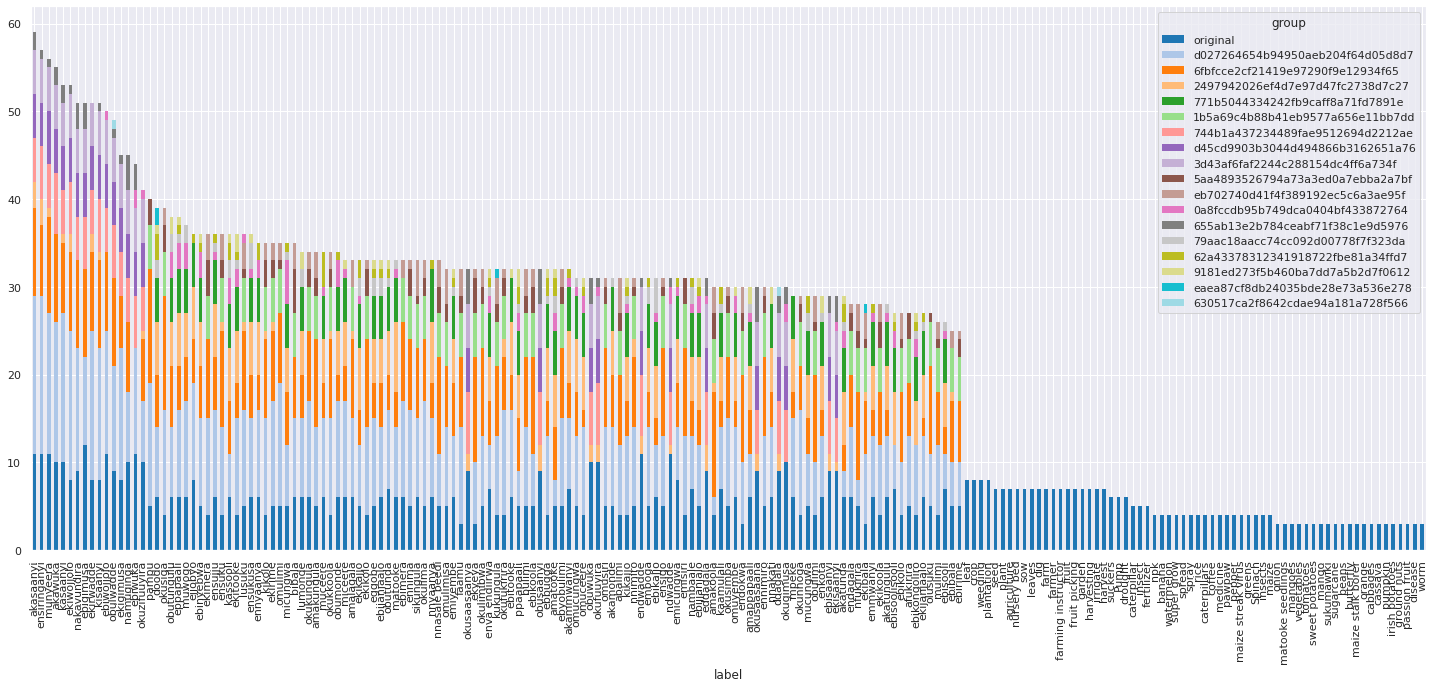

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20', linewidth=0);

In [11]:
val_df = dataset_df[dataset_df['group'] == 'original'].groupby('label').head(2)

In [13]:
train_df = dataset_df[~dataset_df.index.isin(val_df.index)]

In [14]:
train_df

,fn,label,utt_id,group
70,audio_files/AE3WTTT.wav,akawuka,AE3WTTT,original
97,audio_files/GEUB5I5.wav,leaves,GEUB5I5,original
103,audio_files/TESJUNV.wav,okufuuyira,TESJUNV,original
111,audio_files/J2OSRQ2.wav,ebigimusa,J2OSRQ2,original
129,audio_files/Q2AAWXA.wav,ebigimusa,Q2AAWXA,original
...,...,...,...,...
4704,nlp_keywords/emiyembe/d027264654b94950aeb204f6...,emiyembe,d027264654b94950aeb204f64d05d8d7,d027264654b94950aeb204f64d05d8d7
4705,nlp_keywords/emiyembe/d027264654b94950aeb204f6...,emiyembe,d027264654b94950aeb204f64d05d8d7,d027264654b94950aeb204f64d05d8d7
4706,nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e...,emiyembe,6fbfcce2cf21419e97290f9e12934f65,6fbfcce2cf21419e97290f9e12934f65
4707,nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e...,emiyembe,6fbfcce2cf21419e97290f9e12934f65,6fbfcce2cf21419e97290f9e12934f65


In [18]:
4323 + 386

4709